## Accident number by trafficway_identifier (Top 15)

In [1]:
# Fourth part: accident by trafficway_identifier

import pandas as pd
import numpy as np
from google.cloud import bigquery

## Extract the data from bigquery ##
client = bigquery.Client(project='phydata-desafio1')
QUERY5 = """
SELECT
  trafficway_identifier,
  COUNT(*) AS num_accidents
FROM
  `phydata-desafio1.nhtsa_traffic_fatalities.accident_2015`
GROUP BY
  trafficway_identifier
ORDER BY
  num_accidents DESC
  LIMIT 15
  """
query_job = client.query(QUERY5)  # API request
results = query_job.result()  # Waits for query to finish
data_frame_trafficway_identifier = results.to_dataframe()
name_database = 'trafficway_identifier_accidents' # Name of the database
data_frame_trafficway_identifier.to_csv(name_database + '.csv', index=False) # Save the data in a csv file

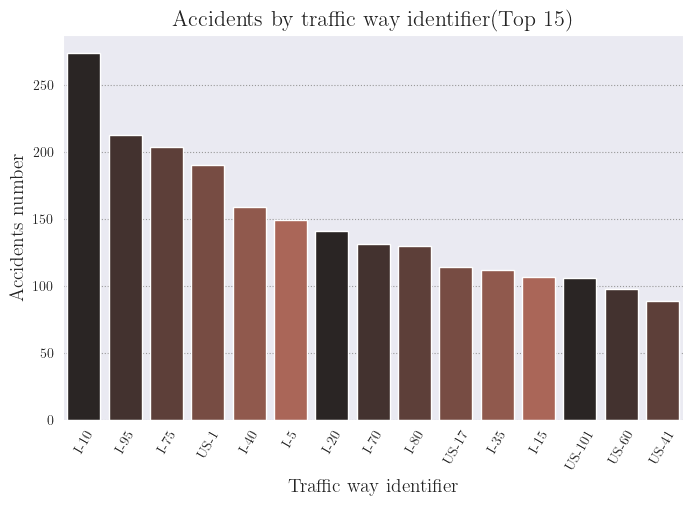

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# Accident number by traffic way (Top 15)

# Configurar el estilo de seaborn
#palette = sns.color_palette("Spectral")
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
palette = sns.dark_palette((20, 60, 50), input="husl")
# Crear el gráfico de barras con seaborn
plt.figure(figsize=(8, 5))  # Tamaño del gráfico
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
sns.barplot(x='trafficway_identifier', y='num_accidents', data=data_frame_trafficway_identifier, palette=palette)

# Etiquetas y título
plt.xlabel(r'Traffic way identifier',fontdict={'fontsize': 14})
plt.ylabel(r'Accidents number',fontdict={'fontsize': 14})
plt.title(r'Accidents by traffic way identifier(Top 15)',fontdict={'fontsize': 16})

# Rotar etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=60)

# Mostrar el gráfico
plt.show()